## Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
# Loading the amazon uk price dataset
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers



### Part 1: Understanding Product Categories

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [6]:
df['category'].value_counts(ascending=False)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [9]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value in the 'category'
proportion_table = df['category'].value_counts(normalize=True)

display(frequency_table)
display(proportion_table*100)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

category
Sports & Outdoors                         34.221949
Beauty                                     0.790293
Handmade Clothing, Shoes & Accessories     0.786896
Bath & Body                                0.781290
Birthday Gifts                             0.776625
                                            ...    
Alexa Built-In Devices                     0.004379
Motorbike Chassis                          0.004379
Plugs                                      0.004379
Smart Home Security & Lighting             0.004256
Smart Speakers                             0.002210
Name: proportion, Length: 296, dtype: float64

The top 5 most listed product categories are :
- Sports & Outdoors
- Beauty
- Handmade Clothing, Shoes & Accessories
- Bath & Body
- Birthday Gifts

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*


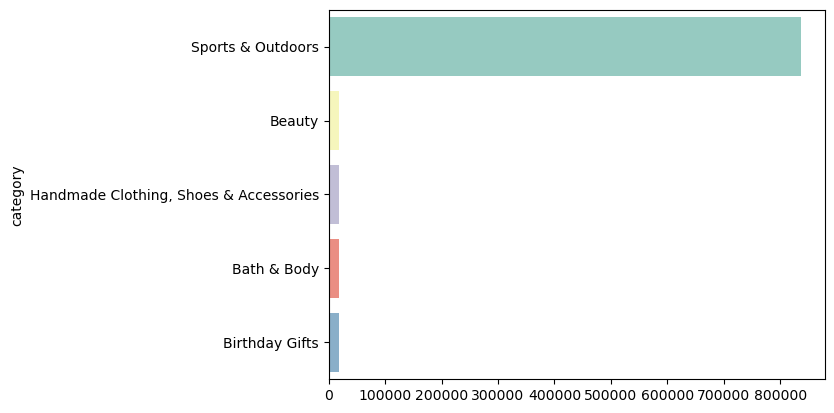

In [11]:
top_5_categories = ['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories', 'Bath & Body', 'Birthday Gifts']
sns.barplot(x=frequency_table[top_5_categories].values, y=frequency_table[top_5_categories].index, palette="Set3");

- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

<Axes: ylabel='count'>

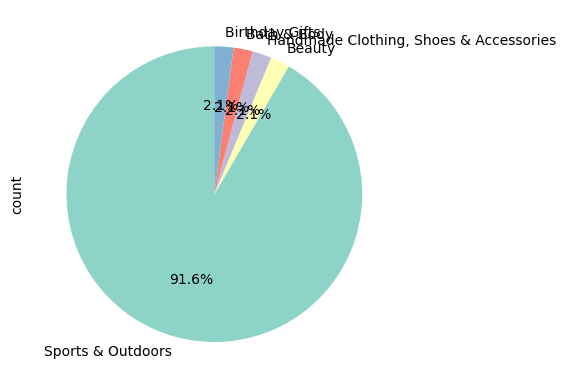

In [9]:
frequency_table[top_5_categories].plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

Yes, the category 'Sports & Outdoors' dominate the listings.


### Part 2: Delving into Product Pricing


1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [16]:
price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode = df['price'].mode()

print(f'The mean for the price of products is:', price_mean)
print(f'The median for the price of products is:', price_median)
print(f'The mode for the price of products is:', price_mode)

The mean for the price of products is: 89.24380943923663
The median for the price of products is: 19.09
The mode for the price of products is: 0    9.99
Name: price, dtype: float64


The mean price of products is £89.24, indicating that if we sum up all the prices of the products and divide by the total number of products, we get an average price of £89.24.

The mode price is £9.99, meaning that the most common price among the products is £9.99.

Comparatively, we can say that the mean (89.24) is significantly higher than the most common price point (9.99). This suggests that there is a wide variability in product prices, with some products being significantly higher priced than the average.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [35]:
variance_price = df['price'].var()
std_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
price_IQR = Q3 - Q1

print("Variance:", variance_price)
print("\n")
print("Standard deviation:", std_price)
print("\n")
print("Min:", min_price)
print("\n")
print("Max:", max_price)
print("\n")
print("Interquartile range (IQR):", price_IQR)

Variance: 119445.4853225653


Standard deviation: 345.6088617535223


Min: 0.0


Max: 100000.0


Interquartile range (IQR): 36.0


The variance of approximately 119445.49 and the standard deviation of approximately 345.61 indicate that the product prices exhibit a considerable degree of variability. This suggests that the prices are spread out from the mean, with some products priced significantly higher or lower than the average.

The minimum price of 0.0 and the maximum price of 100000.0 further demonstrate the wide range of prices observed in the dataset. The presence of such extreme values indicates significant disparities in pricing, which could be influenced by various factors such as product type, quality, or market demand.

Additionally, the interquartile range (IQR) of 36.0 highlights the spread of prices within the middle 50% of the dataset. While the IQR is relatively small compared to the range of prices, it still signifies a notable variation in prices among the majority of products.

Overall, these indicators suggest that the product prices exhibit a significant spread, with considerable variability observed across the dataset.

3. **Visualizations**:
   - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

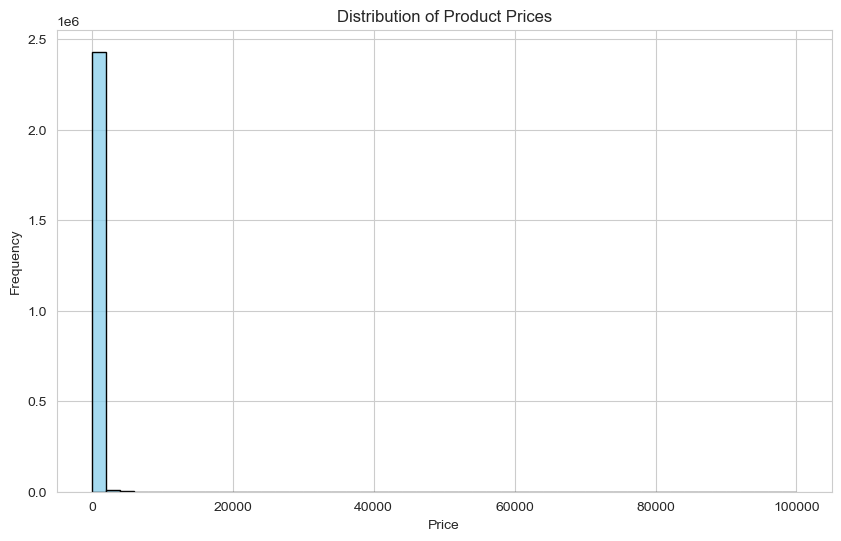

In [36]:
# histogram for product price distribution :

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, color='skyblue', edgecolor='black', kde=False)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

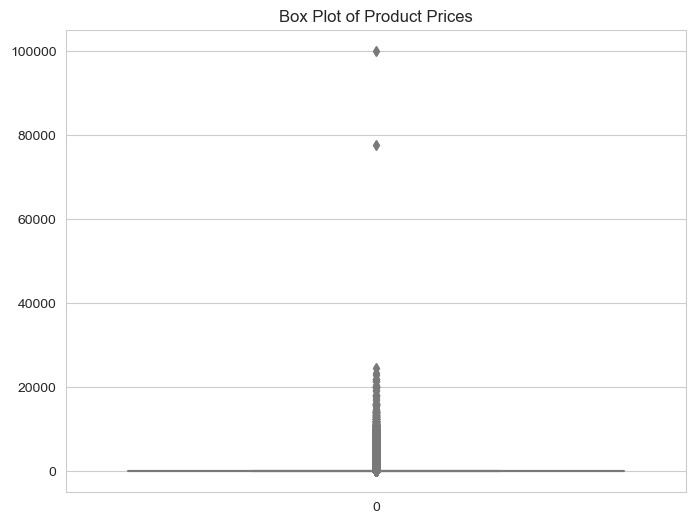

In [41]:
# box plot for product price distribution :

plt.figure(figsize=(8, 6))
sns.boxplot(data = df['price'], color="lightblue")
plt.title('Box Plot of Product Prices')
plt.show()

We can say that, while most products on Amazon UK are priced affordably, there are a few outliers with significantly higher prices. These outliers make it difficult to interpret histograms and boxplots, as they skew the distribution. Overall, while the majority of products are priced within a reasonable range, there are notable exceptions with higher price points.


### Part 3: Unpacking Product Ratings

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [43]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()

print(f'The mean for the rating of products is:', mean_rating)
print(f'The median for the rating of products is:', median_rating)
print(f'The mode for the rating of products is:', mode_rating)

The mean for the rating of products is: 2.152836472966065
The median for the rating of products is: 0.0
The mode for the rating of products is: 0    0.0
Name: stars, dtype: float64


The mean rating for products is 2.15, indicating that, on average, customers give products a rating slightly above 2.

The median rating is 0.0, and the mode is also 0.0, suggesting that the most frequent rating given by customers is 0.

Given these results, it appears that customers generally give products lower ratings. The fact that both the median and mode are 0 is a bit strange, and it could most probably indicate errors or missing values in the dataset or no ratings given by the customers.

Further analysis would be needed to understand the reasons behind these ratings and whether there are specific patterns or trends across different types of products.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [47]:
variance_rating = df['stars'].var()
std_rating = df['stars'].std()

Q1 = df['stars'].quantile(0.25)
Q3 = df['stars'].quantile(0.75)
rating_IQR = Q3 - Q1

print("Variance:", variance_rating)
print("Standard deviation:", std_rating)
print("Interquartile range (IQR):", rating_IQR)

Variance: 4.81743402976196
Standard deviation: 2.1948653785054697
Interquartile range (IQR): 4.4


The variance of approximately 4.82 and the standard deviation of approximately 2.19 indicate a moderate degree of variability in the ratings. This suggests that there is a certain amount of variation in customer feedback, as the ratings are spread out from the mean.

Additionally, the interquartile range (IQR) of 4.4 provides further evidence of variability in the ratings. While the IQR represents the spread of the middle 50% of the data, a larger IQR suggests a wider variation in customer feedback.

Therefore, based on these statistics, it can be inferred that there is a moderate degree of variation in customer feedback, rather than consistent ratings across the board.

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [48]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

- Skewness: The skewness of approximately 0.081 indicates a slight skewness towards the right (positive skewness), but the magnitude is relatively small, suggesting a near symmetrical distribution.

- Kurtosis: A negative kurtosis value suggests that the distribution has fewer extreme values (outliers) compared to a normal distribution.

Based on these values, the ratings are not perfectly normally distributed. Instead, they exhibit a slight skewness towards higher values but have a flatter distribution with thinner tails than a normal distribution. This suggests that there may be a tendency for ratings to cluster around certain values, with fewer extreme ratings. However, the distribution is not heavily skewed or heavily tailed, indicating a relatively balanced distribution overall.

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

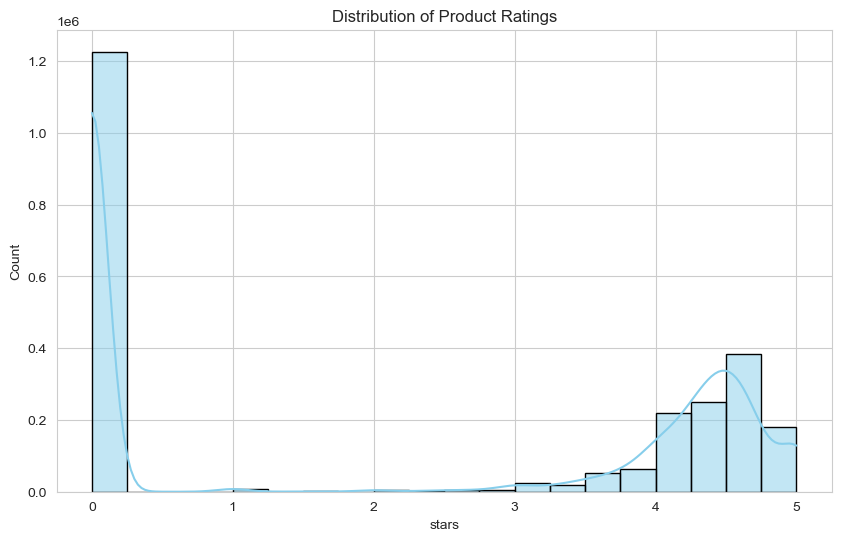

In [53]:
# histogram for product ratings distribution :

plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Product Ratings')
plt.show()

From the visualization, we can make the following observations:

- Many products are rated 0, indicating a substantial number of items with no reviews or ratings.
- For products that do have ratings, there is a noticeable trend towards higher ratings, particularly in the 4 to 5-star range.